In [1]:
from pathlib import Path
import os, sys
import random   
from PIL import Image
from IPython.display import display
import pandas as pd
import torch

PROJECT_ROOT = Path.cwd()
SRC_DIR = PROJECT_ROOT / "data"  
TEST_DIR = PROJECT_ROOT / "data" / "Test"
TRAIN_CSV = SRC_DIR / "Train.csv"
TEST_CSV  = SRC_DIR / "Test.csv"
EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".ppm"}

print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Machine:", torch.cuda.get_device_name(0))
print("Projet:", PROJECT_ROOT)
print("Dataset :", SRC_DIR)
print("Train.csv existe:", TRAIN_CSV.exists())
print("Test.csv existe:", TEST_CSV.exists())


CUDA available: True
Machine: NVIDIA GeForce GTX 1650 Ti
Projet: D:\Projets\Machine learning\GTSRB
Dataset : D:\Projets\Machine learning\GTSRB\data
Train.csv existe: True
Test.csv existe: True


In [17]:
# Build classification dataset
from pathlib import Path
import shutil, random

random.seed(0)

CLASS_NAMES_FR = {
 0:"Limitation_20",1:"Limitation_30",2:"Limitation_50",3:"Limitation_60",
 4:"Limitation_70",5:"Limitation_80",6:"Fin_Limitation_80",7:"Limitation_100",
 8:"Limitation_120",9:"Interdiction_Depasser",10:"Interdiction_Depasser_PL",
 11:"Priorite_Prochaine_Intersection",12:"Route_Prioritaire",13:"Cedez_Le_Passage",
 14:"Stop",15:"Interdiction_Tous_Vehicules",16:"Interdiction_Poids_Lourds",
 17:"Sens_Interdit",18:"Danger",19:"Virage_Gauche",20:"Virage_Droite",
 21:"Double_Virage",22:"Chaussee_Deformee",23:"Chaussee_Glissante",
 24:"Retrecissement",25:"Travaux",26:"Feux_Tricolores",27:"Passage_Pietons",
 28:"Passage_Enfants",29:"Passage_Velos",30:"Risque_Verglas",31:"Animaux_Sauvages",
 32:"Fin_Toutes_Limitations",33:"Tourner_Droite",34:"Tourner_Gauche",
 35:"Tout_Droit",36:"Tout_Droit_Ou_Droite",37:"Tout_Droit_Ou_Gauche",
 38:"Obligation_Passer_Droite",39:"Obligation_Passer_Gauche",40:"Rond_Point",
 41:"Fin_Interdiction_Depasser",42:"Fin_Interdiction_Depasser_PL"
}

ROOT = Path.cwd()
TRAIN_SRC = ROOT / "data/Train"
OUT = ROOT / "cls_dataset"
TRAIN_OUT = OUT / "train"
VAL_OUT = OUT / "val"
VAL_RATIO = 0.2

if OUT.exists():
    shutil.rmtree(OUT)
TRAIN_OUT.mkdir(parents=True)
VAL_OUT.mkdir(parents=True)

for p in TRAIN_SRC.iterdir():
    cid = int(p.name)
    dst = TRAIN_OUT / CLASS_NAMES_FR[cid]
    shutil.copytree(p, dst)

for cls in TRAIN_OUT.iterdir():
    imgs = list(cls.iterdir())
    k = max(1, int(len(imgs) * VAL_RATIO))
    for img in random.sample(imgs, k):
        (VAL_OUT / cls.name).mkdir(exist_ok=True)
        shutil.move(str(img), VAL_OUT / cls.name / img.name)

print("Dataset prêt :", OUT)

Suppression de l'ancien dossier: D:\Projets\Machine learning\GTSRB\cls_dataset
Copied TRAIN classes: 43
Aucun dossier de Test trouvé ; on crée VAL en splittant TRAIN (ratio 20%)
Classe Animaux_Sauvages: moved 156 / 936 -> val
Classe Cedez_Le_Passage: moved 432 / 2592 -> val
Classe Chaussee_Deformee: moved 78 / 468 -> val
Classe Chaussee_Glissante: moved 102 / 612 -> val
Classe Danger: moved 240 / 1440 -> val
Classe Double_Virage: moved 66 / 396 -> val
Classe Feux_Tricolores: moved 120 / 720 -> val
Classe Fin_Interdiction_Depasser: moved 48 / 288 -> val
Classe Fin_Interdiction_Depasser_PL: moved 48 / 288 -> val
Classe Fin_Limitation_80: moved 84 / 504 -> val
Classe Fin_Toutes_Limitations: moved 48 / 288 -> val
Classe Interdiction_Depasser: moved 294 / 1764 -> val
Classe Interdiction_Depasser_PL: moved 402 / 2412 -> val
Classe Interdiction_Poids_Lourds: moved 84 / 504 -> val
Classe Interdiction_Tous_Vehicules: moved 126 / 756 -> val
Classe Limitation_100: moved 288 / 1728 -> val
Classe L

In [19]:
from ultralytics import YOLO

model = YOLO("yolov8n-cls.pt")

model.train(
    data="cls_dataset",
    epochs=20,
    imgsz=64,
    batch=64,
    device=0
)


New https://pypi.org/project/ultralytics/8.3.235 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.232  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=cls_dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=64, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None,

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001CBA3E854E0>
curves: []
curves_results: []
fitness: 0.9955362677574158
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9912000894546509, 'metrics/accuracy_top5': 0.9998724460601807, 'fitness': 0.9955362677574158}
save_dir: WindowsPath('D:/Projets/Machine learning/GTSRB/runs/classify/train2')
speed: {'preprocess': 0.0349154317046376, 'inference': 0.18021443693436226, 'loss': 0.0003053182007292758, 'postprocess': 0.000486812906704496}
task: 'classify'
top1: 0.9912000894546509
top5: 0.9998724460601807


image 1/1 D:\Projets\Machine learning\GTSRB\cls_dataset\val\Chaussee_Deformee\00022_00000_00007.png: 64x64 Chaussee_Deformee 1.00, Passage_Velos 0.00, Chaussee_Glissante 0.00, Travaux 0.00, Passage_Enfants 0.00, 9.4ms
Speed: 245.0ms preprocess, 9.4ms inference, 0.2ms postprocess per image at shape (1, 3, 64, 64)


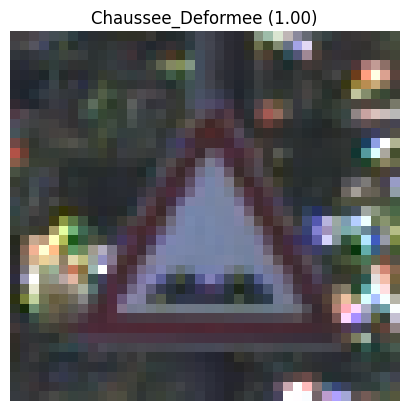

Classe réelle : Chaussee_Deformee
Classe prédite : Chaussee_Deformee
Confiance : 1.00


In [2]:
from ultralytics import YOLO
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random

model = YOLO(r"runs/classify/train2/weights/best.pt")

val_dir = Path("cls_dataset/val")
classe = random.choice([p for p in val_dir.iterdir() if p.is_dir()])
img_path = random.choice(list(classe.iterdir()))

res = model(str(img_path))[0]
cls = int(res.probs.top1)
conf = float(res.probs.top1conf)
nom = model.model.names[cls]

plt.imshow(Image.open(img_path))
plt.title(f"{nom} ({conf:.2f})")
plt.axis("off")
plt.show()

print("Classe réelle :", classe.name)
print("Classe prédite :", nom)
print("Confiance :", f"{conf:.2f}")



image 1/1 D:\Projets\Machine learning\GTSRB\download\images.jpg: 64x64 Route_Prioritaire 1.00, Priorite_Prochaine_Intersection 0.00, Cedez_Le_Passage 0.00, Sens_Interdit 0.00, Chaussee_Glissante 0.00, 9.2ms
Speed: 2.9ms preprocess, 9.2ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


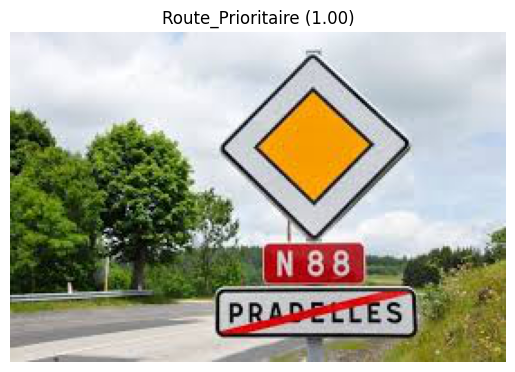

Classe prédite : Route_Prioritaire
Confiance : 1.00


In [10]:
from ultralytics import YOLO
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

model = YOLO(r"runs/classify/train2/weights/best.pt")

img_path = Path(r"D:\Projets\Machine learning\GTSRB\download\images.jpg")

res = model(str(img_path))[0]
cls = int(res.probs.top1)
conf = float(res.probs.top1conf)
nom = model.model.names[cls]

plt.imshow(Image.open(img_path))
plt.title(f"{nom} ({conf:.2f})")
plt.axis("off")
plt.show()

print("Classe prédite :", nom)
print("Confiance :", f"{conf:.2f}")


In [1]:
import cv2
from ultralytics import YOLO
import numpy as np

model = YOLO("runs/classify/train2/weights/best.pt")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # resize
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Classification
    res = model(img, imgsz=64)[0]

    # top prediction
    cls = res.probs.top1
    conf = res.probs.top1conf

    label = f"{model.model.names[cls]} ({conf:.2f})"
    
    cv2.putText(frame, label, (10,30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow("Classifier Webcam", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):                  #q pour quitter
        break

cap.release()
cv2.destroyAllWindows()



0: 64x64 Tout_Droit_Ou_Droite 0.57, Fin_Interdiction_Depasser 0.17, Cedez_Le_Passage 0.13, Obligation_Passer_Droite 0.03, Route_Prioritaire 0.02, 10.5ms
Speed: 58.1ms preprocess, 10.5ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 Cedez_Le_Passage 0.76, Limitation_30 0.10, Stop 0.10, Route_Prioritaire 0.01, Tout_Droit_Ou_Droite 0.01, 8.3ms
Speed: 6.3ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 Cedez_Le_Passage 0.73, Stop 0.12, Limitation_30 0.11, Route_Prioritaire 0.02, Tout_Droit_Ou_Droite 0.00, 9.2ms
Speed: 5.8ms preprocess, 9.2ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 Cedez_Le_Passage 0.69, Stop 0.17, Limitation_30 0.10, Route_Prioritaire 0.01, Tout_Droit_Ou_Droite 0.00, 8.1ms
Speed: 5.6ms preprocess, 8.1ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)

0: 64x64 Cedez_Le_Passage 0.72, Stop 0.14, Limitation_30 0.10, Route_Prioritaire 0.01, Tout_Droit_Ou_Dro